# Baseball Case Study

Problem Statement:
    
    
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 



-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors


    
    -- Output: Number of predicted wins (W)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
data.shape

(30, 17)

lets visualize the data and check the correlation

# checking correlation

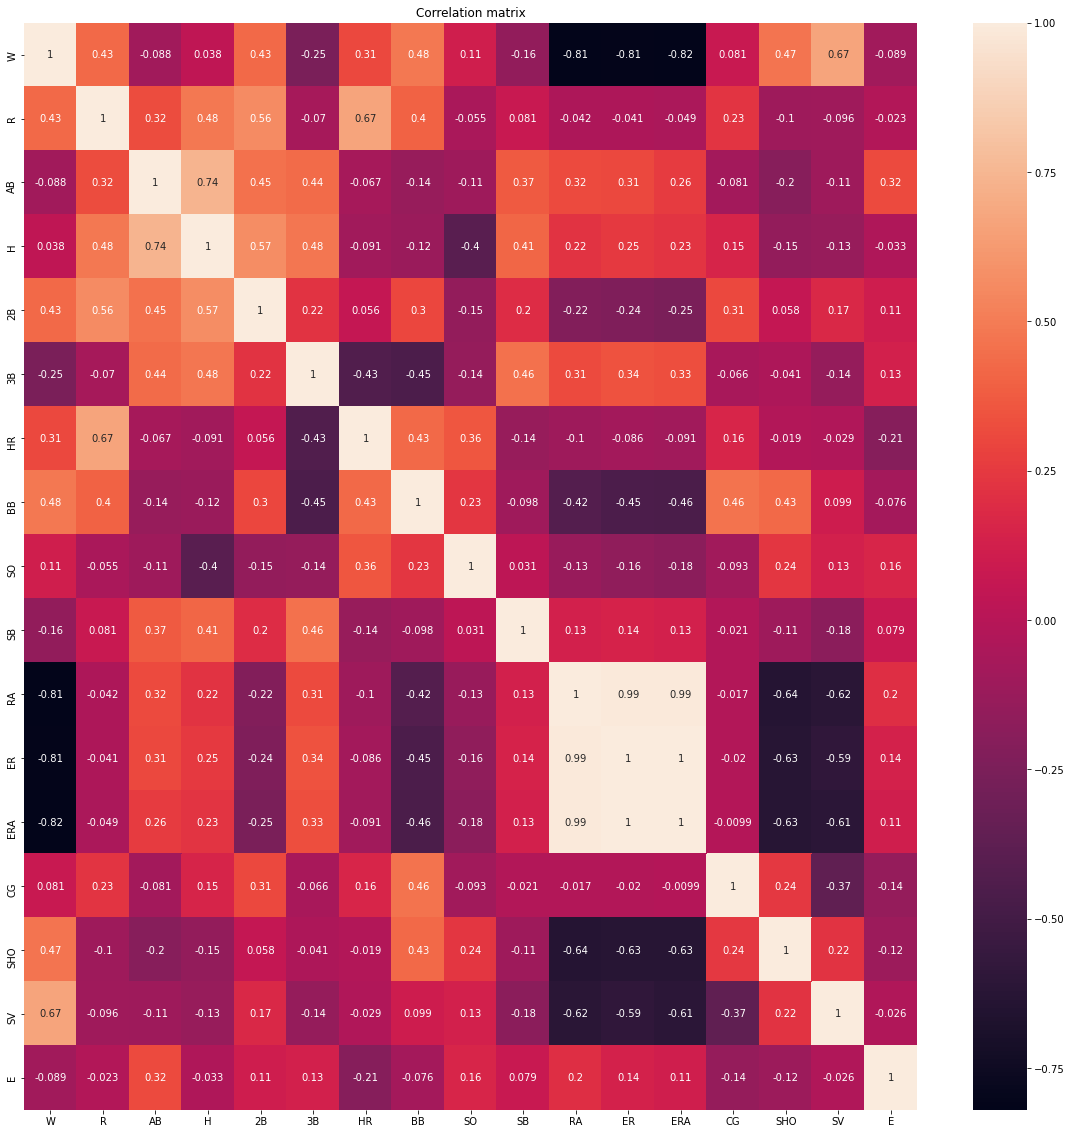

In [7]:
#let's visualize the relationship
data.corr()

corr_mat=data.corr()
#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation matrix")
plt.show()

In [8]:
#lets delete the column which is highly correlated
data=data.drop(["RA"],axis=1)
data=data.drop(["ER"],axis=1)
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97


In [9]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [10]:
corr_mat=data.corr()
corr_mat["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ERA   -0.819600
Name: W, dtype: float64

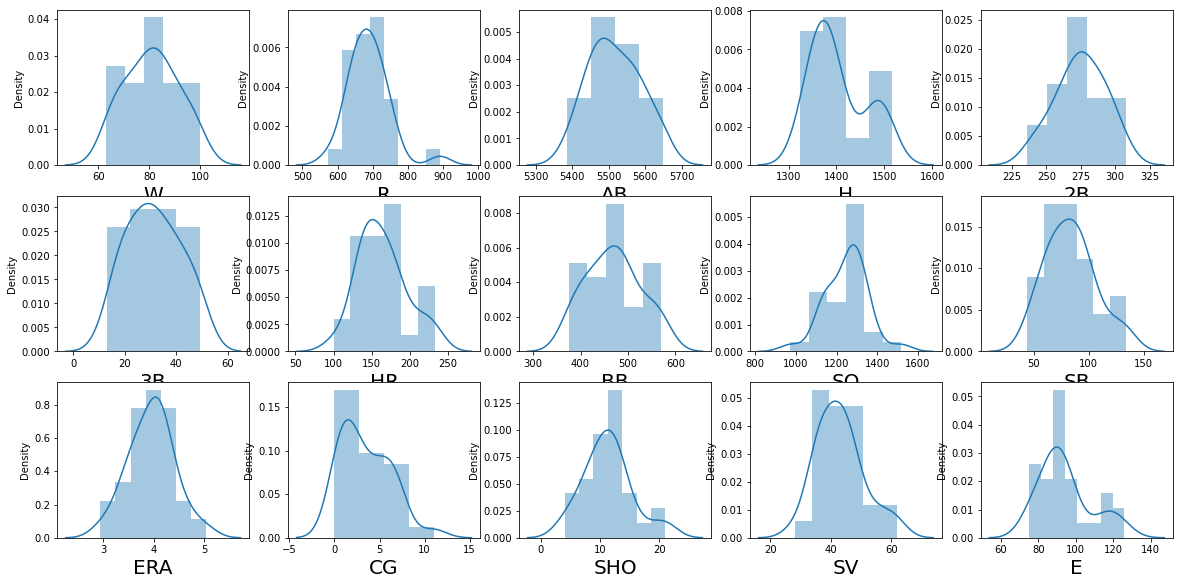

In [11]:
#let's see how data is distributed for every column
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

data is fairly distributed lets proceed further

In [12]:
#split the data in target nad features
x=data.drop(["W"],axis=1)
y=data["W"]

In [13]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97


In [14]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# check skewness

In [15]:
x.skew().sort_values()

2B    -0.230650
SO    -0.156065
ERA    0.053331
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

some columns are skeweed lets treat them using power_transform

In [16]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [17]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,0.0,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,0.0,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,0.0,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.520959,1.220103,0.251775,-1.095010,-0.532211
5,0.0,0.0,0.0,1.998506,-1.461062,1.937860,1.708067,-0.957960,0.298238,-0.343110,1.220103,-0.245393,-1.269438,-0.334953
6,0.0,0.0,0.0,-0.198558,-1.224911,1.460099,1.461121,-0.228668,-0.910154,0.172549,0.064630,-2.099326,0.718082,0.104539
7,0.0,0.0,0.0,-1.556454,-1.110302,1.583551,-0.904450,0.807174,-2.102897,0.217193,-1.729889,-0.245393,0.104606,-1.614550
8,0.0,0.0,0.0,0.141687,0.130611,0.200058,-0.559191,0.594561,0.255285,-0.478328,-0.909181,0.251775,1.905480,0.261504
9,0.0,0.0,0.0,1.099405,0.225256,0.007404,0.204599,-0.986257,-0.489090,0.794823,0.064630,-0.245393,-0.309109,0.409004


In [18]:
#validating that skewness is removed or not
x.skew().sort_values()

3B    -0.072933
CG    -0.059785
2B    -0.035315
SB    -0.010455
BB    -0.007760
HR    -0.000065
R      0.000000
AB     0.000000
H      0.000000
SV     0.000836
ERA    0.001746
SHO    0.006560
SO     0.041170
E      0.063909
dtype: float64

now the skewness has been removed now we are good to go

# check outliers

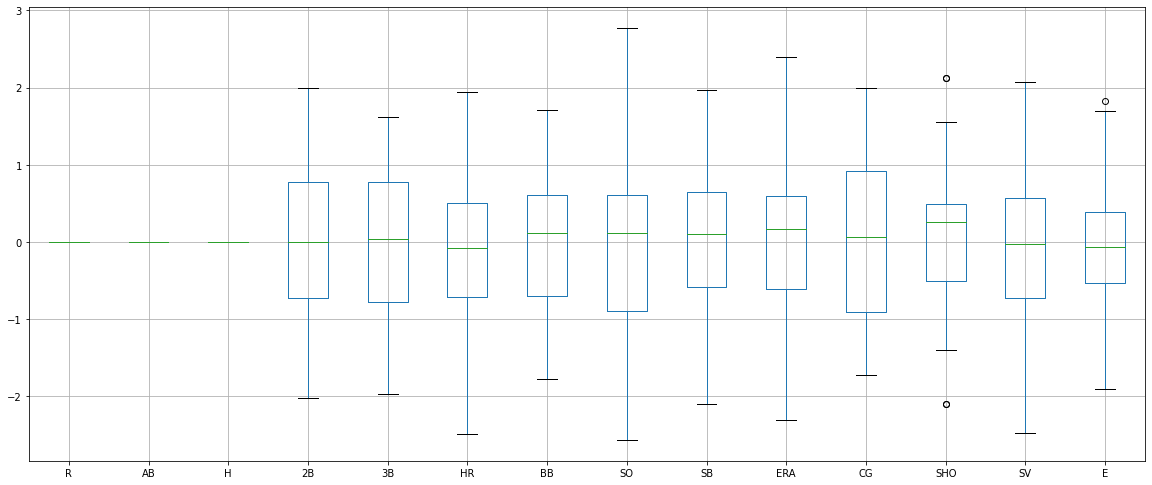

In [19]:
#plotting boxplot for columns
x.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

just 2-3 outliers are there so we can proceed further

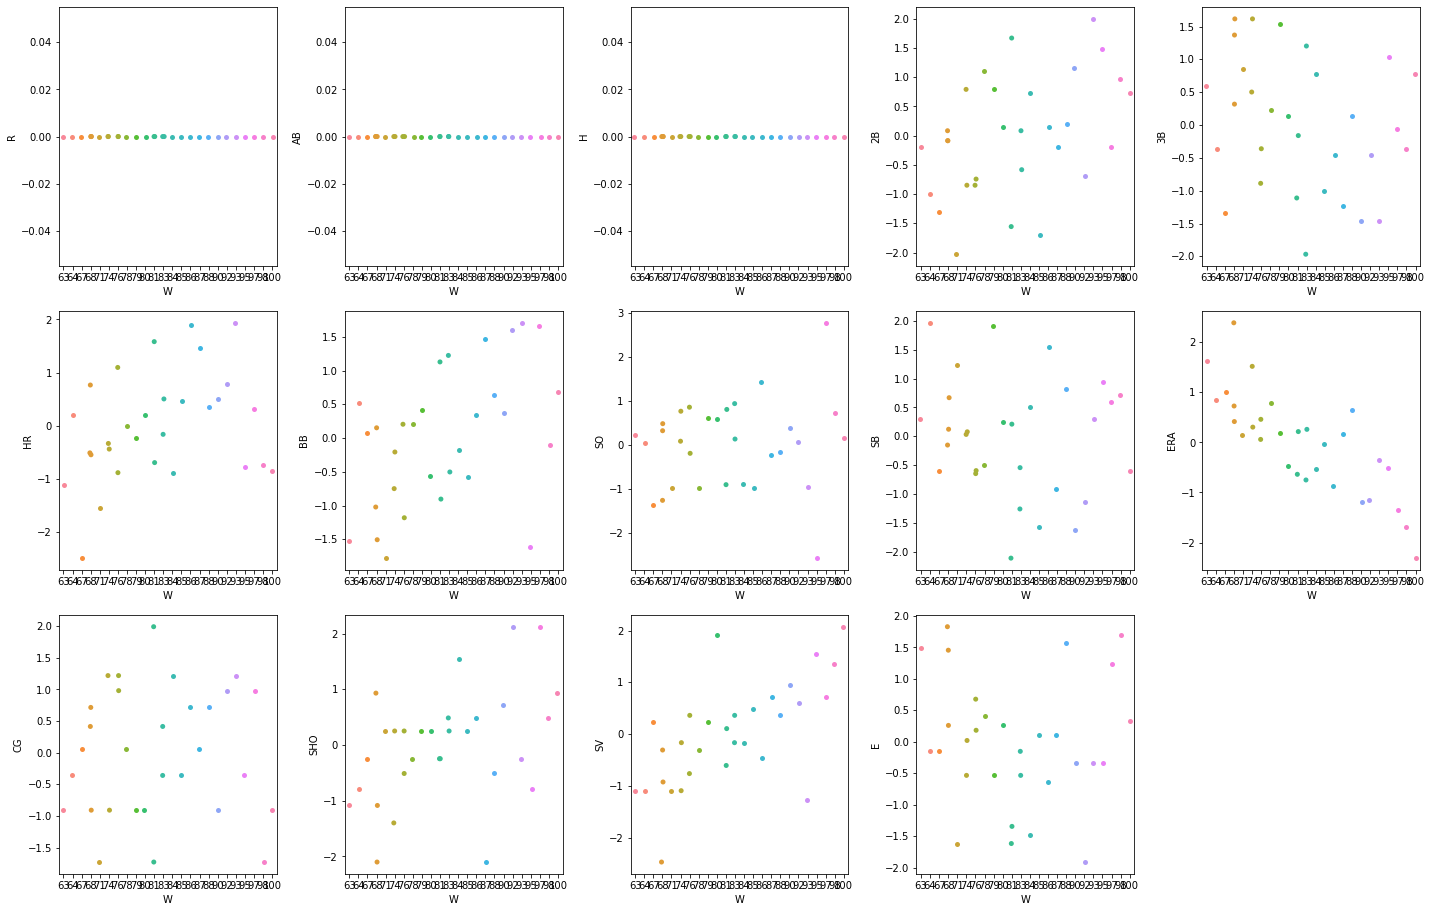

In [20]:
#let's see how features are related to class
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()


greta let's proceed by checking multicollinearity in the dependent variables. before that we should scale our data. let's use standard scalar for that

# Data Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [22]:
x_scaled

array([[ 0.        ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.50089346,
        -0.35984364, -0.78957937,  1.546378  , -0.3349525 ],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.26180619,
        -0.35984364,  0.25177537,  0.36044386, -0.53221128],
       [ 0.        ,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.63645949,
         1.99351257, -0.24539345, -0.6075936 , -1.34233137],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.06080381,
         1.22010317, -0.51075929, -0.76445333,  0.67852361],
       [ 0.        ,  0.        ,  0.        ,  0.79218291,  1.61644394,
        -0.3298501 , -0.20677062,  0.08545863,  0.07962852,  1.52095856,
         1.22010317,  0.25

In [23]:
x_scaled.shape[1]

14

finding variance inflation factor in each scaled column i.e. x_scaled1

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,NaN,R
1,NaN,AB
2,NaN,H
3,1.966827,2B
4,2.590174,3B
5,1.836029,HR
6,2.809971,BB
7,1.773390,SO
8,1.587700,SB
9,3.858488,ERA


all the values are less than 5 that means there is no multicollinearity

# Training Process

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [26]:
#finding  best random state
maxAccu=0     #maximum accuracy
maxRS=0       #best random state value for which max accuracy is achieved

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is :",maxAccu,"on Random_state",maxRS)

Best Accuracy is : 0.8912771354439261 on Random_state 48


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=48)

In [28]:
x_train

array([[ 0.        ,  0.        ,  0.        ,  1.99850636, -1.4610616 ,
         1.93785984,  1.7080669 , -0.95796004,  0.29823789, -0.34310973,
         1.22010317, -0.24539345, -1.26943834, -0.3349525 ],
       [ 0.        ,  0.        ,  0.        ,  0.79218291,  1.53515592,
        -0.22643599,  0.41304265,  0.61473509,  1.9006571 ,  0.19487476,
        -0.90918054,  0.25177537,  0.23438459, -0.53221128],
       [ 0.        ,  0.        ,  0.        , -0.58265234, -1.96666084,
         0.50658869,  1.22443057,  0.93965496, -1.2533623 , -0.74966224,
         0.41526799,  0.48616028, -0.16691871, -0.15049335],
       [ 0.        ,  0.        ,  0.        ,  0.1416866 ,  0.130611  ,
         0.20005848, -0.55919142,  0.59456066,  0.25528505, -0.47832824,
        -0.90918054,  0.25177537,  1.90547983,  0.26150364],
       [ 0.        ,  0.        ,  0.        ,  0.1993895 ,  0.130611  ,
         0.35550255,  0.63434931, -0.17008409,  0.82545098,  0.6397999 ,
         0.71644471, -0.51

In [29]:
x_test

array([[ 0.        ,  0.        ,  0.        ,  0.73160797,  0.77187241,
        -0.8790486 , -0.17035471, -0.88231827,  0.50760474, -0.52346697,
         1.22010317,  1.55042485, -0.16691871, -1.47586961],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.06080381,
         1.22010317, -0.51075929, -0.76445333,  0.67852361],
       [ 0.        ,  0.        ,  0.        , -0.08627816,  0.31882221,
        -0.54284278, -1.02214896,  0.48388272,  0.12413531,  0.728428  ,
        -0.90918054, -1.08415811, -0.30910856,  1.45599167],
       [ 0.        ,  0.        ,  0.        , -0.19855793,  0.5934617 ,
        -1.1154812 , -1.52765389,  0.23412141,  0.29823789,  1.63032615,
        -0.90918054, -1.08415811, -1.09501024,  1.49759735],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.26180619,
        -0.35984364,  0.25

In [30]:
y_train

5     93
27    79
21    83
8     80
10    88
7     81
28    74
11    86
20    90
14    68
22    71
12    85
25    92
2     81
23    67
6     87
29    68
16    98
4     74
17    97
19    64
0     95
Name: W, dtype: int64

In [31]:
y_test

26     84
3      76
18     68
24     63
1      83
15    100
13     76
9      78
Name: W, dtype: int64

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
#Ajusted r2 score
lr.score(x_train,y_train)*100

84.31135725133522

 let's check how well it fits the test data

In [34]:
lr.score(x_test,y_test)*100

89.1277135443926

# let's plot and visualize

In [36]:
y_pred=lr.predict(x_test)

In [37]:
y_pred

array([ 84.12011394,  76.75294311,  73.92294652,  64.30614979,
        81.01977039, 100.71942308,  83.20224206,  79.24955443])

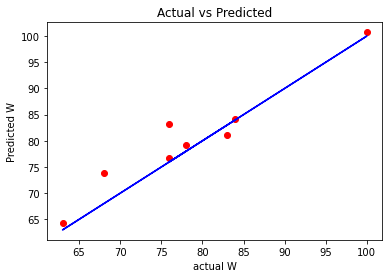

In [38]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("actual W")
plt.ylabel("Predicted W")
plt.title("Actual vs Predicted")
plt.show()

# Cross validation of the model

In [41]:
train_accuracy=lr.score(x_train,y_train)
test_accuracy=lr.score(x_test,y_test)
from sklearn.model_selection import cross_val_score,GridSearchCV
cv_score=cross_val_score(lr,x_scaled,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
    

0.032157013907650245

# Ensemble Technique

In [42]:
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [43]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2_score :',rfs*100)

rfscore=cross_val_score(rf,x_scaled,y,cv=5)
rfc=rfscore.mean()
print('Cross_val_score :',rfc*100)

R2_score : 68.3108561643836
Cross_val_score : -77.23960499293388


# conclusion

In [44]:
import pickle

In [45]:
#save file
filename='Baseball.pkl'
pickle.dump(rf,open(filename,'wb'))

In [47]:
loaded_model=pickle.load(open('Baseball.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

68.3108561643836


In [48]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Orignal","Predicted"])
conclusion

,0,1,2,3,4,5,6,7
Orignal,85.03,78.65,73.61,70.57,79.06,88.98,80.85,73.5
Predicted,85.03,78.65,73.61,70.57,79.06,88.98,80.85,73.5
